# Project: Medical Appointment No Shows 2016


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains 110527  medical appointments associated with 14 variables (characteristics). The most important one if the patient show-up or no-show at the appointment. I will try to know what is characteristics of the patients that no-show. I will answer some questions like Are the majority of the patients that no-shows female or male?

#### Columns

- PatientId

Identification of a patient
- AppointmentID

Identification of each appointment
- Gender

Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
- AppointmentDay

The day of the actuall appointment, when they have to visit the doctor.
- ScheduledDay

The day someone called or registered the appointment, this is before appointment of course.
- Age

How old is the patient.
- Neighbourhood

Where the appointment takes place.
- Scholarship

True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
- Hipertension

True or False
- Diabetes

True or False
- Alcoholism

True or False
- Handcap

True or False
- SMS_received

1 or more messages sent to the patient.
- No-show

True or False.

### Exploration Questions
- Are the majority of patients female or male? 
- Are the majority of patients have diabetes? 
- Are the majority of patients have alcoholism?
- Do the majority of patients take the scholarship?
- Do the patients that no-shows have Hypertension?
- Are the majority of the patients that no-shows female or male?
- Do the majority of the patients that no-shows took the scholarship or not?
- Do the patients that no-show at the appointment have diabetes?
- Do the patients, that no-show at the appointment have alcoholism?
- Do the patients that no-show at the appointment handicapped?
- Does the appointment place affect whether the patient no-show?
- Does the patients that no-show received SMSs?
- What age group that most likely to no-show at the appointment?
- Does waiting time affect if people no-show appointments or not?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df = pd.read_csv('noshowappointments.csv')

In [3]:
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

<a id='wrangling'></a>
## Data Wrangling

### Assessing Data

In [4]:
# take a look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- There aren't nan values in this data set.
- This dataset contains 110527  entries.
- There are one variable of type float, 8 variables of type int, and 5 variables of type object.
- 'ScheduledDay' and 'AppointmentDay' columns data types need to be converted into DateTime.

In [5]:
# Check if there are variables that contains wrong data.

In [6]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [7]:
df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

The 'Handcap' column is binary, so any value outside it is an error on the data.

In [8]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

Hmmm, What do -1 stand for?

After seeing discussion on Kaggle 

Dataset creator says that these types of patients are considered babies not born yet, pregnant women.

### Data Cleaning 
- Dropping useless columns.
- Converting 'ScheduledDay' and 'AppointmentDay' columns data types into DateTime. 
- Drop rows  that contain wrong values in 'Handcap' column.

In [9]:
# making a copy of data
df_cleaning = df.copy()

In [10]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [11]:
# dropping useless columns
df_cleaning.drop(columns=['PatientId', 'AppointmentID'], inplace=True)

In [12]:
# Check that the columns were dropped
df_cleaning.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [13]:
# Converting 'ScheduledDay' and 'AppointmentDay' columns data types into DateTime.
df_cleaning.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df_cleaning.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [14]:
# check the data types 
df_cleaning.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [15]:
# create 'Handcap' column contain only 0 and 1 since it is binary
df_cleaning = df_cleaning.query('Handcap == 0 or Handcap == 1')

In [16]:
df_cleaning.Handcap.unique()

array([0, 1], dtype=int64)

In [17]:
# check for duplicated values
df_cleaning.duplicated().sum()

632

In [18]:
df_cleaning.drop_duplicates(inplace=True)

In [19]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109696 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          109696 non-null  object             
 1   ScheduledDay    109696 non-null  datetime64[ns, UTC]
 2   AppointmentDay  109696 non-null  datetime64[ns, UTC]
 3   Age             109696 non-null  int64              
 4   Neighbourhood   109696 non-null  object             
 5   Scholarship     109696 non-null  int64              
 6   Hipertension    109696 non-null  int64              
 7   Diabetes        109696 non-null  int64              
 8   Alcoholism      109696 non-null  int64              
 9   Handcap         109696 non-null  int64              
 10  SMS_received    109696 non-null  int64              
 11  No-show         109696 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.9+ MB


Now, there are 109696 entries, and the data is ready to explore.

In [20]:
df = df_cleaning.copy()

In [21]:
# create waiting time column
df['waiting_time'] = (df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date).dt.days

# check for values less than zero
df[df['waiting_time'] < 0].shape[0]

5

In [22]:
# Drop values that are less than zero.
df = df[df.waiting_time >= 0]
df.shape

(109691, 13)

<a id='eda'></a>
## Exploratory Data Analysis

### 1.Are the majority of patients female or male?

In [23]:
# plot a bar plot
def bar_plot(x, height, title=None, xlabel=None, ylabel=None,width= None, color=None):
    plt.bar(x, height, color=color)
    # title of the plot
    plt.title(title)
    # x-axis title
    plt.xlabel(xlabel)
    # y-axis title
    plt.ylabel(ylabel)

In [24]:
# plot a pie chart that represents the proportions of each item in this variable.
def pie_plot(x, labels, autopct, title=None):
    plt.figure(figsize=(8, 8))
    plt.pie(x, labels=labels, autopct=autopct)
    plt.title(title)
    plt.show()

F    71306
M    38385
Name: Gender, dtype: int64


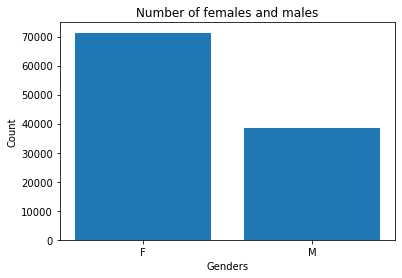

In [25]:
# get the number of females and males
count_gender = df.Gender.value_counts()
print(count_gender)
locations = df.Gender.unique()
bar_plot(locations, count_gender, title= 'Number of females and males', xlabel = 'Genders', ylabel = 'Count')

- It seems that the majority of patients are females.

### 2.How many patients have diabetes?

0    101841
1      7850
Name: Diabetes, dtype: int64


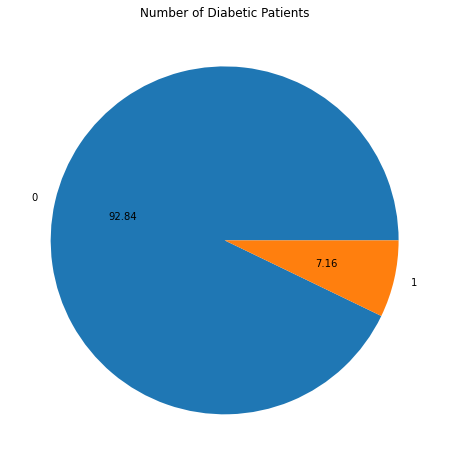

In [26]:
# count the number of patients that have diabetes and who don't
count_diabetic = df.Diabetes.value_counts()
print(count_diabetic)
labels = df.Diabetes.value_counts().index
pie_plot(count_diabetic, labels=labels, autopct = '%.2f', title= 'Number of Diabetic Patients')

- The minority of patients had diabetes since 92.84 % of the patients didn't have diabetes. 

### 3.How many patients have alcoholism?

0    106353
1      3338
Name: Alcoholism, dtype: int64


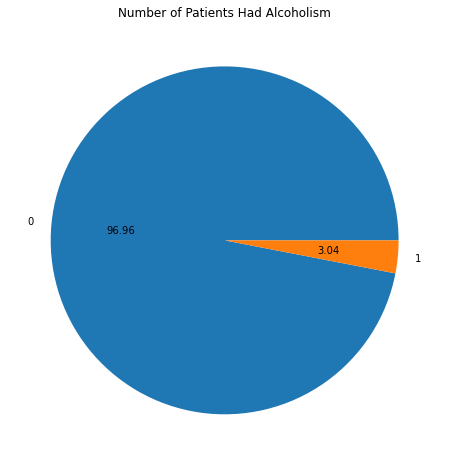

In [27]:
count_alcoholic = df.Alcoholism.value_counts()
print(count_alcoholic)
labels = df.Alcoholism.value_counts().index
pie_plot(count_alcoholic, labels, '%.2f', title='Number of Patients Had Alcoholism')

- The minority of patients had alcoholism since 96.96 % of the patients didn't have alcoholism.

### 4.How many patients take the scholarhsip?

0    98908
1    10783
Name: Scholarship, dtype: int64


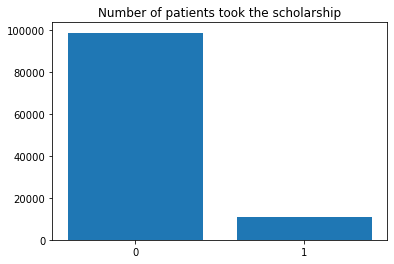

In [28]:
count_num= df.Scholarship.value_counts()
print(count_num)
locations = ['0', '1']
bar_plot(x= locations, height = count_num, title = 'Number of patients took the scholarship')

- It seems that the majority of patients didn't take the scholarship.

### How many patients have Hypertension?

0    88100
1    21591
Name: Hipertension, dtype: int64


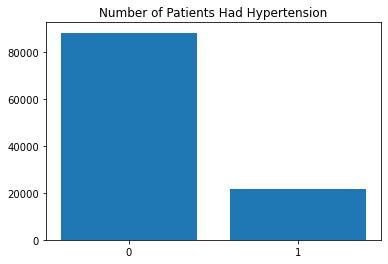

In [29]:
count_ = df.Hipertension.value_counts()
print(count_)
locations = ['0', '1']
bar_plot(x= locations, height = count_, title= 'Number of Patients Had Hypertension')

- It seems that the majority of patients didn't have hypertension

In [30]:
# function to plot the distribution of categorical variable 
# since the countplot function show the counts of observations in each categorical bin using bars.
def countplot_ratio(x = None, data = None, hue = None, ax = None):
    # plot the variable
    ax = sns.countplot(x, data = data, hue = hue, ax = ax)
    # names of x labels
    ax.set_xticklabels(ax.get_xticklabels())
    # plot title
    ax.set_title(x + " Distribution")
    # total number of data which used to get the proportion
    total = float(len(data))
    # for loop to iterate on the patches
    for patch in ax.patches:
        # get the height of the patch which represents the number of observations.
        height = patch.get_height()
        # Put text on each patch with the proportion of the observations
        ax.text(patch.get_x()+patch.get_width()/2,height+4,'{:.2f}%'.format((height/total)*100),weight = 'bold',
                fontsize = 12,ha = 'center')

### How many patients no-show at the appointment, and how many do so?

No     87639
Yes    22052
Name: No-show, dtype: int64


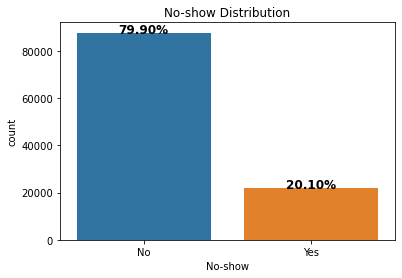

In [31]:
count_noshow = df['No-show'].value_counts()
print(count_noshow)
countplot_ratio(x = 'No-show', data = df)

- Most patients go on time, representing 79.90% of all patients.

In [32]:
# Let's work on the data associated with the patients that no-show at the appointment.
df_no_show = df.loc[df['No-show'] == 'Yes']

In [33]:
df_no_show.head()

Gender              ScheduledDay            AppointmentDay  Age  \
6       F 2016-04-27 15:05:12+00:00 2016-04-29 00:00:00+00:00   23   
7       F 2016-04-27 15:39:58+00:00 2016-04-29 00:00:00+00:00   39   
11      M 2016-04-26 08:44:12+00:00 2016-04-29 00:00:00+00:00   29   
17      F 2016-04-28 09:28:57+00:00 2016-04-29 00:00:00+00:00   40   
20      F 2016-04-27 07:51:14+00:00 2016-04-29 00:00:00+00:00   30   

     Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
6       GOIABEIRAS            0             0         0           0        0   
7       GOIABEIRAS            0             0         0           0        0   
11  NOVA PALESTINA            0             0         0           0        0   
17       CONQUISTA            1             0         0           0        0   
20  NOVA PALESTINA            0             0         0           0        0   

    SMS_received No-show  waiting_time  
6              0     Yes             2  
7              0     Yes             2  
11             1     Yes             3  
17             0     Yes             1  
20             0     Yes             2

In [34]:
# drop 'No-show' column since it's useless now.
df_no_show = df_no_show.drop(columns='No-show')

In [35]:
# check that the 'No-show' column is dropped
df_no_show.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'waiting_time'],
      dtype='object')

### Does waiting time affect if people no-show appointments or not?

(15.814892073281335, 8.73900888873675)

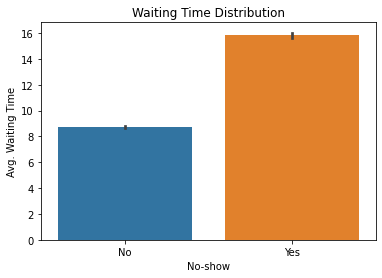

In [36]:
sns.barplot(data = df, x = 'No-show', y = 'waiting_time')
plt.title('Waiting Time Distribution');
plt.ylabel("Avg. Waiting Time")
df[df['No-show'] == 'Yes']['waiting_time'].mean(), df[df['No-show'] == 'No']['waiting_time'].mean()

- Now, we can see that the average waiting time for people who no-show appointments is bigger than for those who don't do so. This is means that the more the waiting time is, the more people who no-show appointments.

### What gender likely to no-show at the appointment, females or males?

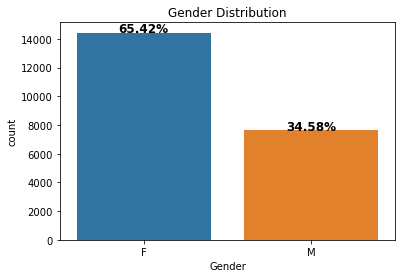

In [37]:
# Gender distribution associated with patients that no-show
countplot_ratio(x= 'Gender', data= df_no_show)

- The majority of patients who no-show at the appointment are females where they represent 65.42% of all patients who no-show.

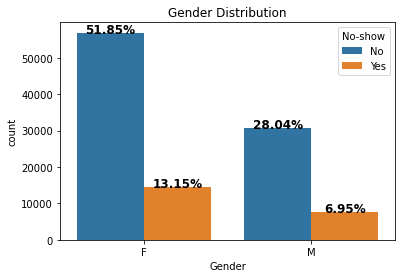

In [38]:
# Gender distribution associated with all patients.
countplot_ratio(x= 'Gender', data= df, hue= 'No-show')

- 13.15% of all patients are females and no-show at the appointment.
- 6.95% of all patients are males and no-show at the appointment.

### Do the patients that no-show at the appointment have diabetes?

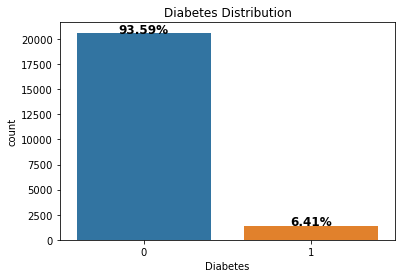

In [39]:
# Diabetes distribution associated with patients that no-show
countplot_ratio(x = 'Diabetes', data= df_no_show)

- The majority of patients who no-show at the appointment didn't have diabetes, representing 93.59% of all patients who no-show.

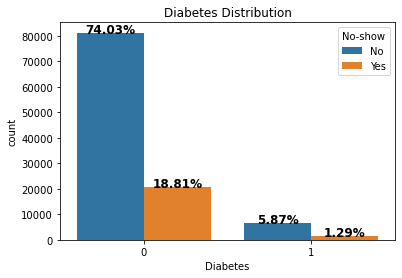

In [40]:
# Gender distribution associated with all patients.
countplot_ratio(x = 'Diabetes', data= df, hue= 'No-show')

- 18.81% of all patients didn't have diabetes and no-show at the appointment.
- 1.29% of all patients have diabetes and no-show at the appointment.

### How many patients no-show at the appointment and have alcoholism?

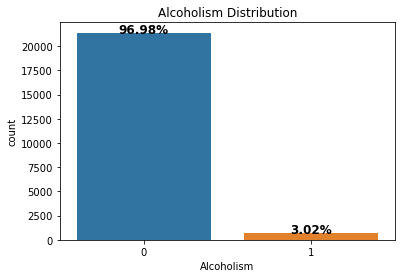

In [41]:
# Alcoholism distribution associated with patients that no-show
countplot_ratio(x= 'Alcoholism', data= df_no_show)

- The majority of patients who no-show at the appointment didn't have alcoholism, representing 96.98% of all patients who no-show.

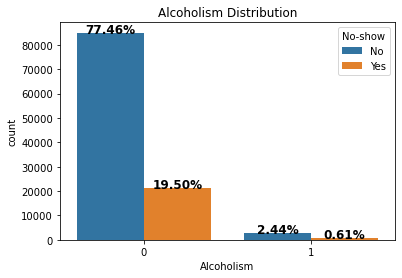

In [42]:
# Alcoholism distribution associated with all patients.
countplot_ratio(x= 'Alcoholism', data= df, hue='No-show')

- 19.50% of all patients didn't have alcoholism and no-show at the appointment.
- 0.61% of all patients have alcoholism and no-show at the appointment.

### How many patients that no-show and didn't take the scholarship?

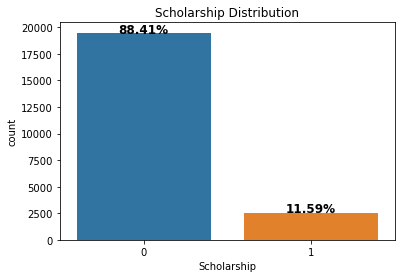

In [43]:
# Scholarship distribution associated with patients that no-show
countplot_ratio(x='Scholarship', data=df_no_show)

- The majority of the patients that didn't no-show at the appointment didn't take the scholarship, representing 88.41% of the patients who no-show.

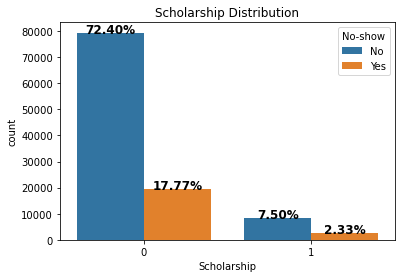

In [44]:
# Scholarship distribution associated with all patients.
countplot_ratio(x='Scholarship', data=df, hue= 'No-show')

- 17.77% of all the patients didn't take the scholarship and didn't no-show at the appointment.
- 2.33% of all the patients took the scholarship, but they didn't no-show at the appointment.

### Do the patients that no-shows have Hypertension?

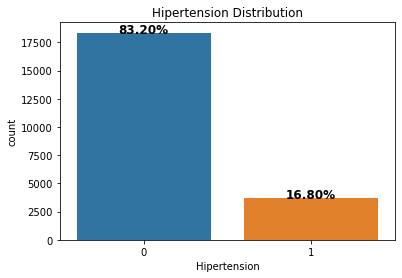

In [45]:
# Hypertension distribution associated with patients that no-show
countplot_ratio(x='Hipertension', data=df_no_show)

- The majority of patients who no-show at the appointment didn't have hypertension, representing 83.20% of all patients who no-show.

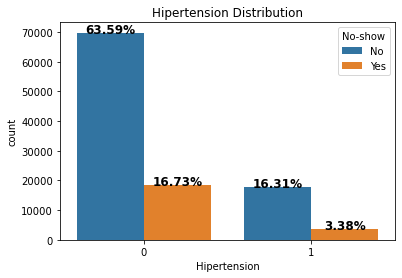

In [46]:
# Hypertension distribution associated with all patients.
countplot_ratio(x='Hipertension', data=df, hue= 'No-show')

- 16.73% of all patients didn't have hypertension and no-show at the appointment.
- 3.38% of all patients have hypertension and no-show at the appointment.

### Do the patients that no-show at the appointment handicapped?


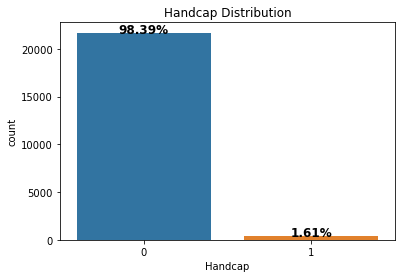

In [47]:
# Handcap distribution associated with patients that no-show
countplot_ratio(x='Handcap', data=df_no_show)

- The majority of patients who no-show at the appointment weren't handicapped , representing 98.39% of all patients who no-show.

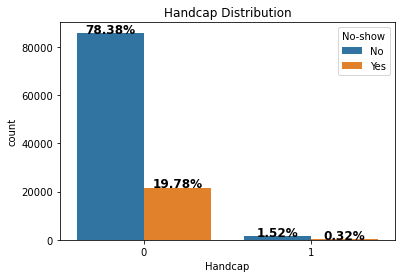

In [48]:
# Handcap distribution associated with all patients.
countplot_ratio(x='Handcap', data=df, hue= 'No-show')

- 19.78% of all patients weren't handicapped and no-show at the appointment.
- 0.32% of all patients were handicapped and no-show at the appointment.

### Does the appointment place affect whether the patient no-show or doesn't?

JARDIM CAMBURI                 1429
MARIA ORTIZ                    1219
ITARARÉ                         900
RESISTÊNCIA                     881
JESUS DE NAZARETH               695
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHA DO FRADE                     2
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64


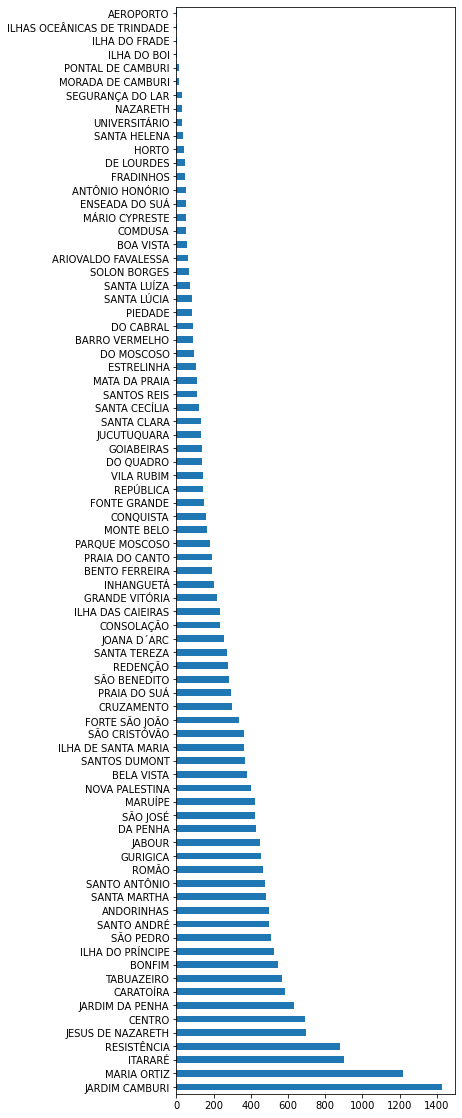

In [49]:
# Neighborhood distribution associated with patients that no-show
neightborhood_count_noshow = df_no_show.Neighbourhood.value_counts()
print(neightborhood_count_noshow)
neightborhood_count_noshow.plot(kind='barh', figsize=(5, 20));

for the patients that no-show at the appointment:
- Most of the appointment was in JARDIM CAMBURI neighborhood.

JARDIM CAMBURI                 7616
MARIA ORTIZ                    5804
RESISTÊNCIA                    4375
JARDIM DA PENHA                3868
ITARARÉ                        3463
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64


<AxesSubplot:>

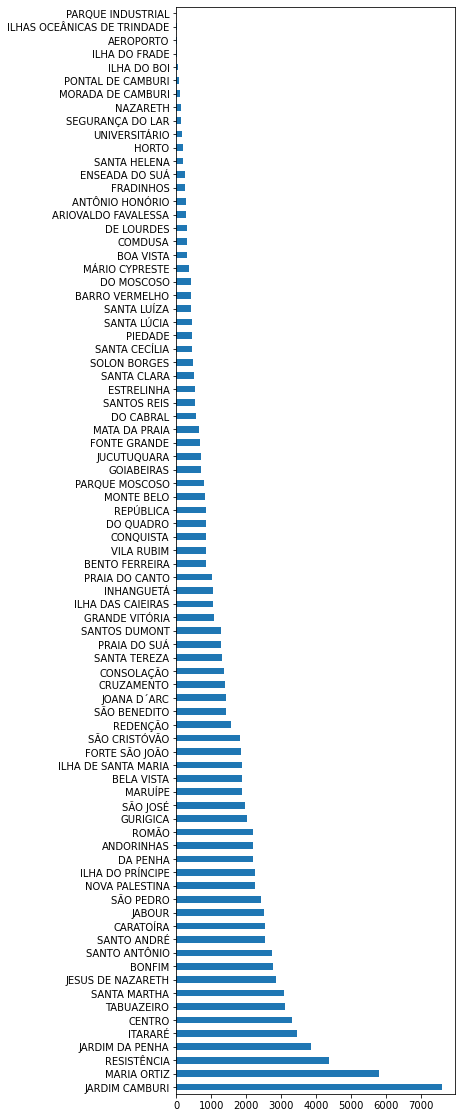

In [50]:
# neighborhood distribution associated with all patients.
neightborhood_count = df.Neighbourhood.value_counts()
print(neightborhood_count)
neightborhood_count.plot(kind='barh', figsize=(5, 20))

for all patients:
- Most of the appointment was in JARDIM CAMBURI neighborhood.

### Does the patients that no-show received SMSs?

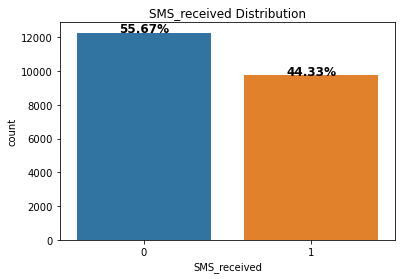

In [51]:
# SMS_received distribution associated with patients that no-show
countplot_ratio(x='SMS_received', data=df_no_show)

- In general, the majority of patients who no-show at the appointment didn't receive SMSs, representing 55.67% of all patients who no-show.

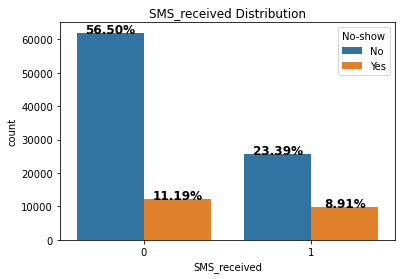

In [52]:
# SMS_received distribution associated with all patients.
countplot_ratio(x='SMS_received', data=df, hue= 'No-show')

- 11.19% of all patients didn't receive SMSs and no-show at the appointment.
- 8.91% of all patients receive SMSs and no-show at the appointment.

### What age group that most likely to no-show at the appointment?

In [53]:
age_levels = df.Age.describe()[3:]
bin_edges = age_levels.tolist()
bin_edges = [int(age) for age in bin_edges]
bin_edges

[-1, 18, 37, 55, 115]

In [54]:
# Labels for the four age groups 
bin_names = ['-1:18', '18:37', '37:55', '55:115']

In [55]:
df_no_show['age_groups'] = pd.cut(df_no_show['Age'], bins=bin_edges, labels=bin_names)

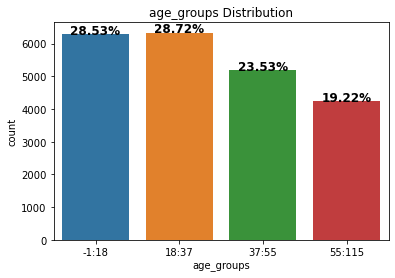

In [56]:
countplot_ratio(x= 'age_groups', data= df_no_show)

- In general, the patients in the age group -1:18 and 18:37 are most likely to no-show at the appointment, representing 28.53% and 28.72% respectively.

<a id='conclusions'></a>
## Conclusions

After digging deep into this dataset, Here are the insights that I got:


1. It seems that the majority of patients are females.
2. The minority of patients had diabetes since 92.84 % of the patients didn't have diabetes. 
3. The minority of patients had alcoholism since 96.96 % of the patients didn't have alcoholism.
4. The majority of patients didn't take the scholarship.
5. The majority of patients didn't have hypertension
6. Most patients go on time, representing 79.90% of all patients.
7. 13.15% of all patients are females and no-show at the appointment 
8. 6.95% of all patients are males and no-show at the appointment.
9. 18.81% of all patients didn't have diabetes and no-show at the appointment.
10. 1.29% of all patients have diabetes and no-show at the appointment.
11. 19.50% of all patients didn't have alcoholism and no-show at the appointment.
12. 0.61% of all patients have alcoholism and no-show at the appointment.
13. 17.77% of all the patients didn't take the scholarship and didn't no-show at the appointment.
14. 2.33% of all the patients took the scholarship, but they didn't no-show at the appointment.
15. 16.73% of all patients didn't have hypertension and no-show at the appointment.
16. 3.38% of all patients have hypertension and no-show at the appointment.
17. 19.78% of all patients weren't handicapped and no-show at the appointment.
18. 0.32% of all patients were handicapped and no-show at the appointment.
19. Most of the appointment was in JARDIM CAMBURI neighborhood.
20. 11.19% of all patients didn't receive SMSs and no-show at the appointment.
21. 8.91% of all patients receive SMSs and no-show at the appointment.
22. The average waiting time for people who no-show appointments is bigger than for those who don't do so. This is means that the more the waiting time is, the more people who no-show appointments.
23. **The characteristics of patients that no-show at the appointment:**
    - The majority of patients who no-show at the appointment are females where they represent 65.42% of all patients who no-show.
    - The majority of patients who no-show at the appointment didn't have diabetes, representing 93.59% of all patients who no-show.
    - The majority of patients who no-show at the appointment didn't have alcoholism, representing 96.98% of all patients who no-show.
    - The majority of the patients that didn't no-show at the appointment didn't take the scholarship, representing 88.41% of the patients who no-show.
    - The majority of patients who no-show at the appointment didn't have hypertension, representing 83.20% of all patients who no-show.
    - The majority of patients who no-show at the appointment weren't handicapped , representing 98.39% of all patients who no-show.
    - Most of the appointment was in JARDIM CAMBURI neighborhood.
    - In general, the majority of patients who no-show at the appointment didn't receive SMSs, representing 55.67% of all patients who no-show.
    - In general, the patients in the age group -1:18 and 18:37 are most likely to no-show at the appointment, representing 28.53% and 28.72% respectively.

**Limitations:**
- I think there are missing features. For instance, If we have a column that indicates whether the patient is employed or not, it will help us get a better conclusion.
- I had some difficulty understand the data. I was confused between the 'AppointmentDay' column and the 'ScheduledDay' column. I do some search to know what they mean. Also, the 'age' column and the 'handicap' column have confusing values.

***Some Charts that demonstrate some of the insights above:***

**Related to all patients:**

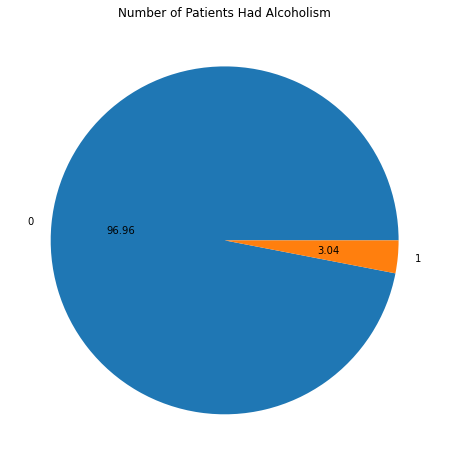
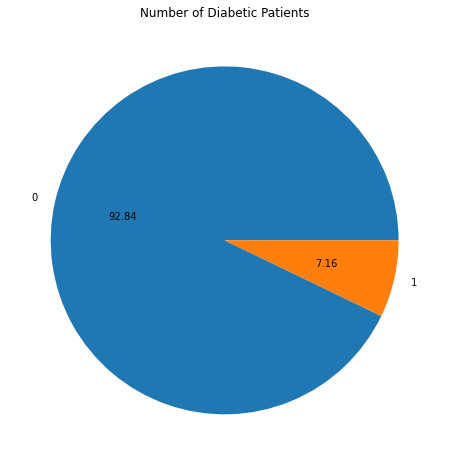
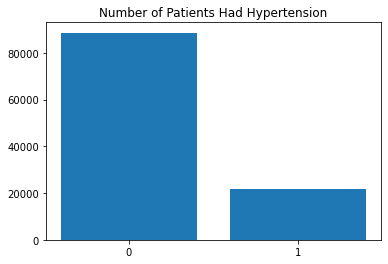
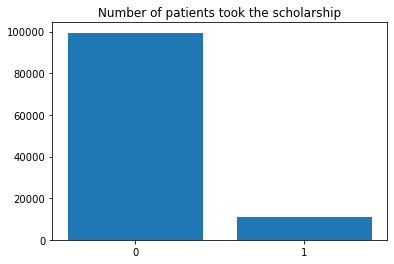

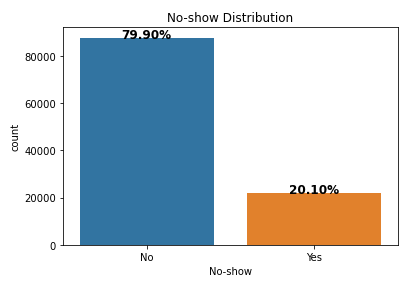
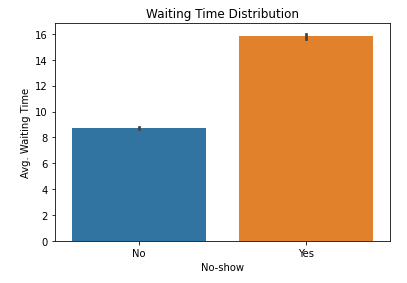

**Related to the patients that no-show at the appointment**

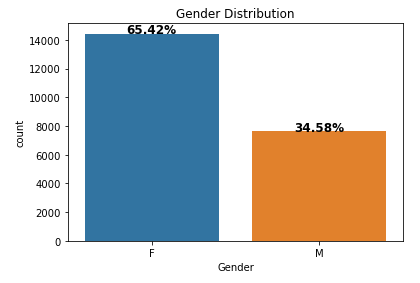
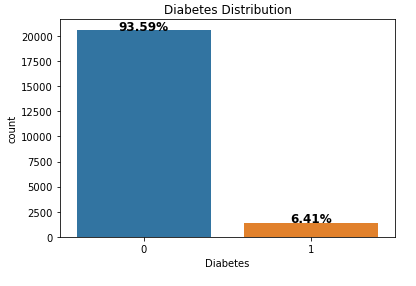
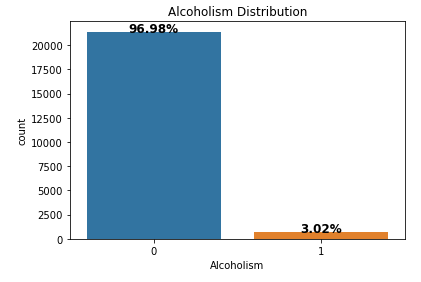
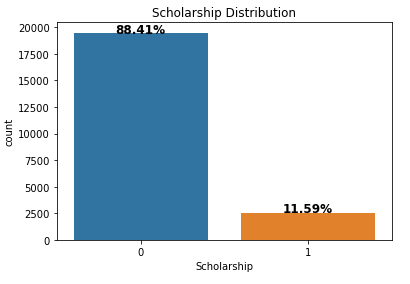
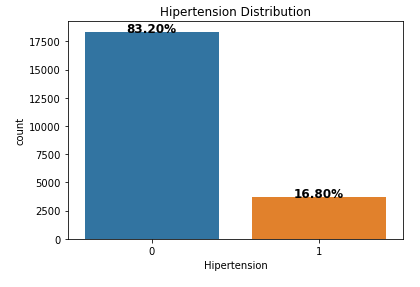